In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords as sw
nltk.download('stopwords')
import string as sr
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import numpy as np
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
a = pd.read_csv('/content/train.csv')

In [ ]:
a.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
a.rename(columns={'label': 'Target', 'sms': 'text'}, inplace=True)

In [ ]:
a.head()

,text,Target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
a.duplicated().sum()

403

In [ ]:
a.drop_duplicates(keep= 'first',inplace = True)

In [ ]:
a.duplicated().sum()

0

([<matplotlib.patches.Wedge at 0x7c49e722d150>,
 [Text(-1.0145649212950327, 0.4250388458454174, 'ham'),
  Text(1.014564901397527, -0.4250388933406287, 'spam')],
 [Text(-0.5533990479791087, 0.23183937046113673, '87.37188'),
  Text(0.5533990371259238, -0.23183939636761564, '12.62812')])

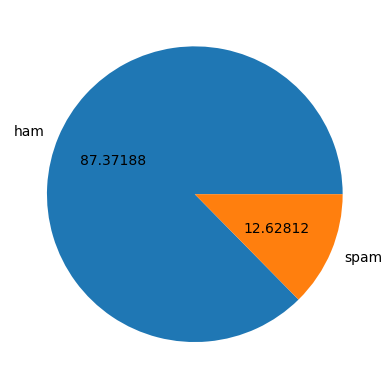

In [ ]:
plt.pie(a['Target'].value_counts(), labels=['ham', 'spam'],autopct= '%0.5f')

In [ ]:
a['Target'].value_counts()

0    4518
1     653
Name: Target, dtype: int64

In [ ]:
a['no_char'] = a['text'].apply(len)

In [ ]:
a.head()

,text,Target,no_char
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156
3,U dun say so early hor... U c already then say...,0,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
a['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5569    [This, is, the, 2nd, time, we, have, tried, 2,...
5570      [Will, ü, b, going, to, esplanade, fr, home, ?]
5571    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5572    [The, guy, did, some, bitching, but, I, acted,...
5573                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5171, dtype: object

In [ ]:
s = 'hi this is your chaddi baddi, it a wounderful day today with planes flying towards world trade centre!, can you guess what is todays date?'
print(nltk.word_tokenize(s))

['hi', 'this', 'is', 'your', 'chaddi', 'baddi', ',', 'it', 'a', 'wounderful', 'day', 'today', 'with', 'planes', 'flying', 'towards', 'world', 'trade', 'centre', '!', ',', 'can', 'you', 'guess', 'what', 'is', 'todays', 'date', '?']


In [ ]:
a['num_char'] = a['text'].apply(len)

In [ ]:
a.head()

,text,Target,no_char,num_char
0,"Go until jurong point, crazy.. Available only ...",0,112,112
1,Ok lar... Joking wif u oni...\n,0,30,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,156
3,U dun say so early hor... U c already then say...,0,50,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62,62


In [ ]:
a.drop('no_char', axis=1, inplace= True)

In [ ]:
a.head()

,text,Target,num_char
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156
3,U dun say so early hor... U c already then say...,0,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62


In [ ]:
# seperating each word: a['text'].apply(lambda x: nltk.word_tokenize(x))
# calculating number of words and storing them into new column:
a['num_words'] = a['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:

a.head()

,text,Target,num_char,num_words
0,"Go until jurong point, crazy.. Available only ...",0,112,24
1,Ok lar... Joking wif u oni...\n,0,30,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37
3,U dun say so early hor... U c already then say...,0,50,13
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15


In [ ]:
#to calculate number of sentences in the text
a['num_sen'] = a['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
a.head()

,text,Target,num_char,num_words,num_sen
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2
1,Ok lar... Joking wif u oni...\n,0,30,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2
3,U dun say so early hor... U c already then say...,0,50,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1


In [ ]:
a[['num_char', 'num_words', 'num_sen']].describe()

,num_char,num_words,num_sen
count,5171.000000,5171.000000,5171.000000
mean,80.332431,18.606459,1.973893
std,58.333188,13.388223,1.458880
min,3.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,62.000000,15.000000,1.000000
75%,120.000000,26.500000,2.000000
max,911.000000,220.000000,38.000000


In [ ]:
#print only ham messages
a[a['Target'] == 0]

,text,Target,num_char,num_words,num_sen
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2
1,Ok lar... Joking wif u oni...\n,0,30,8,2
3,U dun say so early hor... U c already then say...,0,50,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1
6,Even my brother is not like to speak with me. ...,0,78,18,2
...,...,...,...,...,...
5567,Huh y lei...\n,0,13,4,1
5570,Will ü b going to esplanade fr home?\n,0,37,9,1
5571,"Pity, * was in mood for that. So...any other s...",0,58,15,2
5572,The guy did some bitching but I acted like i'd...,0,126,27,1


In [ ]:
#describe only ham messages
a[a['Target']==0][['num_char', 'num_words', 'num_sen']].describe()

,num_char,num_words,num_sen
count,4518.000000,4518.000000,4518.000000
mean,71.894865,17.282205,1.827579
std,56.590179,13.572746,1.394245
min,3.000000,1.000000,1.000000
25%,35.000000,8.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,911.000000,220.000000,38.000000


In [ ]:
#describe only spam messages
a[a['Target']==1][['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,653.000000,653.000000,653.000000
mean,138.710567,27.768760,2.986217
std,29.818940,6.987509,1.494815
min,14.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

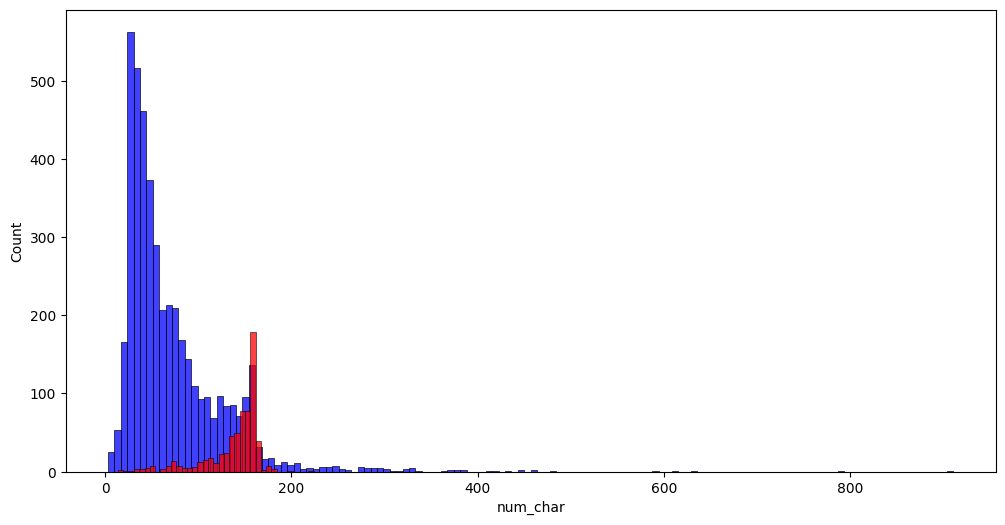

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(a[a['Target']==0]['num_char'],color= 'blue')
sns.histplot(a[a['Target']==1]['num_char'],color= 'red')

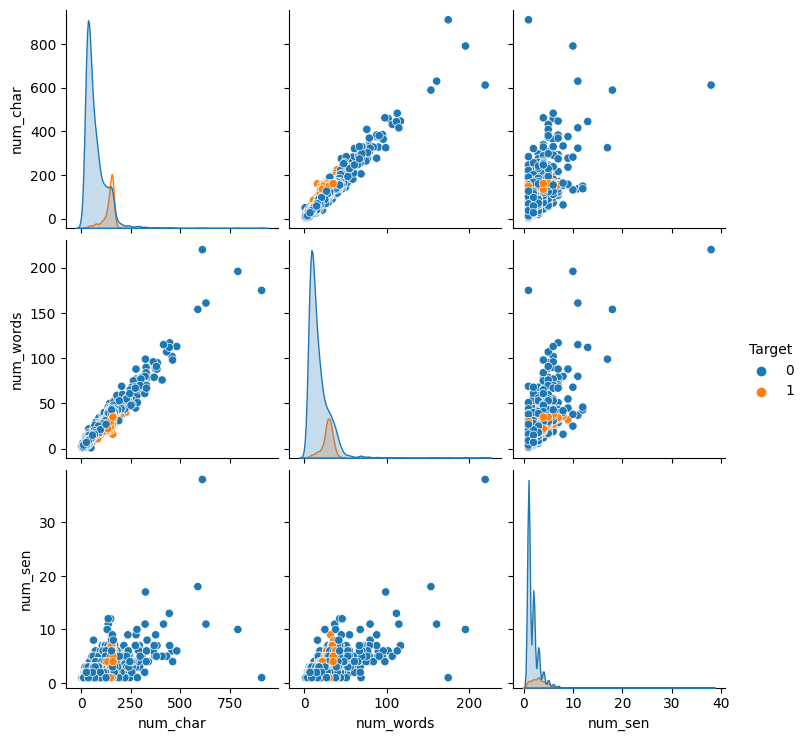

In [ ]:
sns.pairplot(a,hue='Target')

In [ ]:
a.corr()

<ipython-input-32-210c353a220b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a.corr()


,Target,num_char,num_words,num_sen
Target,1.000000,0.380505,0.260200,0.263831
num_char,0.380505,1.000000,0.965923,0.623099
num_words,0.260200,0.965923,1.000000,0.679582
num_sen,0.263831,0.623099,0.679582,1.000000


<ipython-input-33-806856a716dc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(a.corr(), annot=True)


<Axes: >

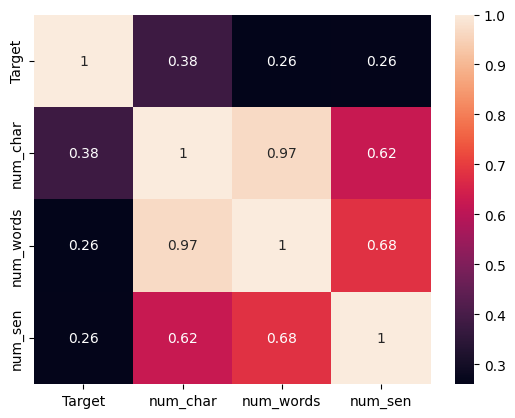

In [ ]:
sns.heatmap(a.corr(), annot=True)

From above Heatmap and correlation, we reach to conclusion that, num_char is related hightest with the targer.

# **3.Data Preprocessing **
1.Lower case
2.Tokenization
3.Removing special chars
4.Removing stop words and punctuation
5.Stemming

In [ ]:
pss = PorterStemmer()

In [ ]:
from tkinter.constants import Y
def tars_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []  #Removing special chars
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text: #Removing stop and punctuations
    if i not in sw.words('english') and i not in sr.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(PorterStemmer().stem(i))
  return " ".join(y)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
tars_text('OOOMMMGGGG ITS PRANAV YELIKAR!!!!')

'ooommmgggg pranav yelikar'

In [ ]:
sw.words('english')

In [ ]:
#sw.words('english')
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
tars_text('OOOOMMGG!!!! IS PRANAV YELIKAR!!!, HE IS THE GRETEST LEADER singing, dancing ALIVE ON THE EARTH!!!, HE HAS A SPECIAL AURA AROUND HIM')

'oooommgg pranav yelikar gretest leader sing danc aliv earth special aura around'

In [ ]:
ps = PorterStemmer() #stemming
print(ps.stem('dancing'))
ps.stem('singers')

danc


'singer'

testing the tras_text()

In [ ]:
x = 2024
print(tars_text(a['text'][x]))
print(a['text'][x])

movi theatr go watch unlimit movi pay
Is there any movie theatre i can go to and watch unlimited movies and just pay once?



In [ ]:
a['tars_text'] = a['text'].apply(tars_text)

In [ ]:
a['text'][3222]

'Thanks for your ringtone order, reference number X29. Your mobile will be charged 4.50. Should your tone not arrive please call customer services 09065989180\n'

In [ ]:
a.head()

,text,Target,num_char,num_words,num_sen,tars_text
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1,nah think goe usf live around though


Using wordCloud to highlite the imortant words in the text

In [ ]:
wc = WordCloud(width=600, height= 600,min_font_size=10, background_color='white')

In [ ]:
spam_wc = wc.generate(a[a['Target']==1]['tars_text'].str.cat(sep=" "))

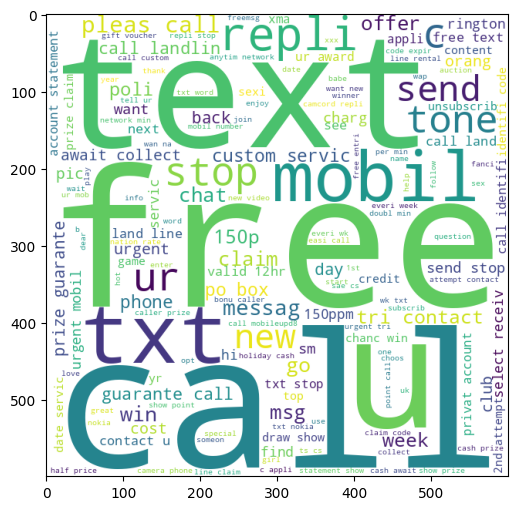

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(a[a['Target'] == 0]['tars_text'].str.cat(sep=" "))

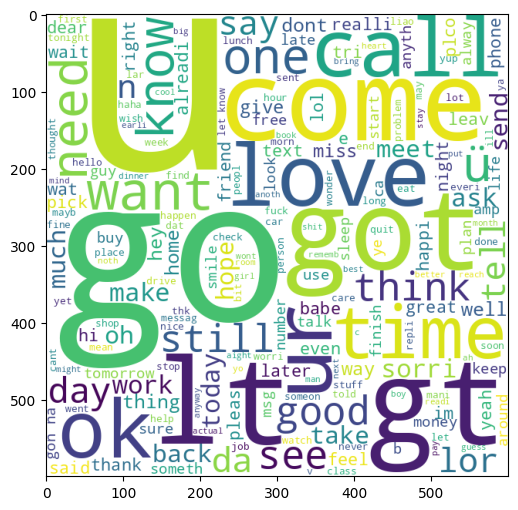

In [ ]:
plt.figure(figsize = (12,6))
plt.imshow(ham_wc)

In [ ]:
a[a['Target']==1]

,text,Target,num_char,num_words,num_sen,tars_text
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,FreeMsg Hey there darling it's been 3 week's n...,1,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,WINNER!! As a valued network customer you have...,1,158,32,5,winner valu network custom select receivea pri...
9,Had your mobile 11 months or more? U R entitle...,1,155,31,3,mobil 11 month u r entitl updat latest colour ...
11,"SIX chances to win CASH! From 100 to 20,000 po...",1,137,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1,91,18,3,want explicit sex 30 sec ring 02073162414 cost...
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,159,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5549,Had your contract mobile 11 Mnths? Latest Moto...,1,161,35,5,contract mobil 11 mnth latest motorola nokia e...
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1,148,30,1,remind o2 get pound free call credit detail gr...


In [ ]:
tex = a[a['Target']==1]['tars_text'].tolist()

In [ ]:
n_lis = []
for i in tex:
  if i not in n_lis:
    n_lis.append(i)


print(n_lis)

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18', 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv', 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour', 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030', 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info', 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18', 'xxxmobilemovieclub use credit click wap link next txt messag click http', 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq', 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg', '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow', 'sm ac sptv

In [ ]:
n_lis

In [ ]:
n_lis = []
for i in tex:
  n_lis.append(nltk.word_tokenize(i))

In [ ]:
n_lis = [e for s in n_lis for e in s] #converting 2D list into 1D

In [ ]:
n_lis

In [ ]:
uniq = []
for i in n_lis:
  if i not in uniq:
    uniq.append(i)

print(uniq)


['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', '87121', 'receiv', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'camera', 'co', '08002986030', 'six', 'chanc', 'cash', '100', 'pound', 'csh11', 'cost', '6day', 'tsandc', 'repli', 'hl', '4', 'info', 'urgent', '1', 'membership', 'jackpot', '81010', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'messag', 'http', 'england', 'v', 'macedonia', 'dont', 'miss', 'news', 'ur', 'nation', 'team', '87077', 'eg', 'tri', 'wale', 'scotland', 'poboxox36504w45wq', 'thank', 'subscript', 'rington', '

In [ ]:
freq = []

for i in uniq:
  z = 0
  for j in n_lis:
    if i == j:
      z = z+1
      freq.append(z)


In [ ]:
freq

In [ ]:
zx = Counter(n_lis).most_common(30)#numbers with their frequecies

In [ ]:
zx = pd.DataFrame(zx)

## **4.Model Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
tfidf = TfidfVectorizer()

In [ ]:
cv = CountVectorizer()

In [ ]:
x = tfidf.fit_transform(a['tars_text']).toarray()# Converting text into numeric value(Vectorization)

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x.shape

(5171, 6782)

In [ ]:
y = a['Target'].values # .values convert panda series into numpy array

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, random_state= 100)

In [ ]:
guss = GaussianNB()
multi = MultinomialNB()
berno = BernoulliNB()

In [ ]:
guss.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
multi.fit(xtrain, ytrain)

MultinomialNB()

In [ ]:
berno.fit(xtrain, ytrain)

BernoulliNB()

In [ ]:
predict1 = guss.predict(xtest)
predict2 = multi.predict(xtest)
predict3 = berno.predict(xtest)

In [ ]:
print(accuracy_score(predict1, ytest))
print(accuracy_score(predict2, ytest))
print(accuracy_score(predict3, ytest))
print()
print(confusion_matrix(predict1, ytest))
print(confusion_matrix(predict2, ytest))
print(confusion_matrix(predict3, ytest))
print()
print(precision_score(predict1, ytest))
print(precision_score(predict2, ytest))
print(precision_score(predict3, ytest))

0.8676328502415459
0.9584541062801932
0.966183574879227

[[797  21]
 [116 101]]
[[913  43]
 [  0  79]]
[[909  31]
 [  4  91]]

0.8278688524590164
0.6475409836065574
0.7459016393442623


In [ ]:
#performing same operation as above with TfidfVectorize
x = TfidfVectorizer().fit_transform(a['tars_text']).toarray()

In [ ]:
x.shape

(5171, 6782)

In [ ]:
y = a['Target'].values

In [ ]:
xtarin, xtest, ytrain, ytest = train_test_split(x, y, random_state= 100, test_size= 0.2)

In [ ]:
guss = GaussianNB()
multi = MultinomialNB()
bernol = BernoulliNB()

In [ ]:
guss.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
pre1 = guss.predict(xtest)

In [ ]:
print(accuracy_score(pre1, ytest))
print(confusion_matrix(pre1, ytest))
print(precision_score(pre1, ytest))

0.8676328502415459
[[797  21]
 [116 101]]
0.8278688524590164


In [ ]:
multi.fit(xtrain, ytrain)

MultinomialNB()

In [ ]:
pre2 = multi.predict(xtest)

In [ ]:
print(accuracy_score(pre2, ytest))
print(confusion_matrix(pre2, ytest))
print(precision_score(pre2, ytest))

0.9584541062801932
[[913  43]
 [  0  79]]
0.6475409836065574


In [ ]:
bernol.fit(xtrain, ytrain)

BernoulliNB()

In [ ]:
pre3 = bernol.predict(xtest)

In [ ]:
print(accuracy_score(pre3, ytest))
print(confusion_matrix(pre3, ytest))
print(precision_score(pre3, ytest))

0.966183574879227
[[909  31]
 [  4  91]]
0.7459016393442623


**After comparing the 3 models, we have choosen MultinomoalNB model**

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(multi,open('model.pkl','wb'))